# 资源使用时间序列可视化

本笔记本用于可视化处理后数据中的 CPU 和内存使用率时间序列。

In [94]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import glob

# 设置可视化样式
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

# 设置更好的图表大小和分辨率
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 100

# 设置中文字体支持（如果需要）
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

In [95]:
# 定义数据目录
data_dir = 'processed_fields_data'

# 列出目录中的所有CSV文件
data_files = glob.glob(os.path.join(data_dir, '*.csv'))
print(f"找到 {len(data_files)} 个数据文件:")
for file in data_files:
    print(f"- {os.path.basename(file)}")

找到 12 个数据文件:
- c7_user_jW2GJpO_timeseries.csv
- c7_user_DrrEIEW_timeseries.csv
- c7_user_czwEXtt_timeseries.csv
- c7_user_aeB11m9_timeseries.csv
- c7_user_6oql0BV_timeseries.csv
- c7_user_8qRmTJa_timeseries.csv
- c7_user_ivQBmew_timeseries.csv
- c7_user_77mZ3L7_timeseries.csv
- c7_user_QXNirTL_timeseries.csv
- c7_user_fxHzmdZ_timeseries.csv
- c7_user_ly4HE4d_timeseries.csv
- c7_user_30Rme1h_timeseries.csv


## 加载并探索数据

In [ ]:
# 选择第一个文件进行分析
#file_path = data_files[0] if data_files else None
file_path = 'processed_all_fields_data/c7_user_ly4HE4d_timeseries.csv' 

if file_path:
    # 读取数据
    df = pd.read_csv(file_path)
    print(f"成功读取数据，形状: {df.shape}")
    
    # 显示数据的前几行
    display(df.head())
    
    # 检查数据类型
    display(df.dtypes)
    
    # 检查必要的列是否存在
    required_columns = ['time_dt', 'average_usage_cpu', 'average_usage_memory']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        print(f"警告: 缺少必要的列: {missing_columns}")
        # 检查是否有替代列
        possible_time_cols = [col for col in df.columns if 'time' in col.lower()]
        possible_cpu_cols = [col for col in df.columns if 'cpu' in col.lower()]
        possible_memory_cols = [col for col in df.columns if 'mem' in col.lower()]
        
        print(f"可能的时间列: {possible_time_cols}")
        print(f"可能的CPU列: {possible_cpu_cols}")
        print(f"可能的内存列: {possible_memory_cols}")
else:
    print("没有找到数据文件，请检查目录路径")

成功读取数据，形状: (4920, 20)


,user,time_dt,collection_id,collection_name,collection_logical_name,start_time_dt,end_time_dt,cpu_usage_distribution,tail_cpu_usage_distribution,priority,instance_index,event,failed,resource_request_cpu,resource_request_memory,average_usage_cpu,average_usage_memory,maximum_usage_cpu,maximum_usage_memory,hour
0,ly4HE4d+6E8BqXgm6E1eGNKu8OiiZE+Gj/D4YUMRFDU=,1970-01-01 00:00:00.000000,261321454525,h6osjjHIMpr543HMmDYMy10wiLZIvxMLNEDHe07Wix4=,uXg7PS0QinS0hu2jPMkHebkDJpZMywmqm/pOwvdFE5s=,1970-01-04 23:00:00,1970-01-04 23:05:00,[0.00013351 0.00014114 0.00014877 0.00015736 0...,[0.00032997 0.00034142 0.00035191 0.00037098 0...,0,11305,ENABLE,0,0.005669,0.002625,0.000210,0.000698,0.001133,0.000700,1970-01-01 00:00:00
1,ly4HE4d+6E8BqXgm6E1eGNKu8OiiZE+Gj/D4YUMRFDU=,1970-01-01 00:20:04.269099,275444450369,Q09xPXEsCsFkN7VrsD1YQsX/bMUavURdsKzbJrDERG0=,JpnDNp7PNu0VgS7e15Z4eezBWdZd6iXYQGB6fdODnJs=,1970-01-04 23:55:00,1970-01-05 00:00:00,[0.00333405 0.00667572 0.01538086 0.01989746 0...,[0.03796387 0.03833008 0.03869629 0.0390625 0...,0,2465,FAIL,1,0.014175,0.003906,0.024353,0.001282,0.048340,0.002674,1970-01-01 00:00:00
2,ly4HE4d+6E8BqXgm6E1eGNKu8OiiZE+Gj/D4YUMRFDU=,1970-01-01 00:21:08.301086,275444572542,8nMel5P6Hbohb4HkEtC7rr/XLbXh8gE5odYgwst4wEY=,c3chkYTIgOxBUHA2xWkTkVyPqkdB/bfAYXnKFjJbZlg=,1970-01-01 08:15:00,1970-01-01 08:20:00,[0.00630188 0.00901794 0.01022339 0.01081848 0...,[0.01438904 0.01455688 0.01469421 0.01481628 0...,0,7952,FAIL,1,0.009720,0.002213,0.011749,0.001890,0.023834,0.001942,1970-01-01 00:00:00
3,ly4HE4d+6E8BqXgm6E1eGNKu8OiiZE+Gj/D4YUMRFDU=,1970-01-01 00:56:04.361849,275444572542,8nMel5P6Hbohb4HkEtC7rr/XLbXh8gE5odYgwst4wEY=,c3chkYTIgOxBUHA2xWkTkVyPqkdB/bfAYXnKFjJbZlg=,1970-01-01 01:45:00,1970-01-01 01:50:00,[0.00395203 0.00660706 0.00693512 0.00717163 0...,[0.00854492 0.00862122 0.00871277 0.00907898 0...,0,5111,ENABLE,0,0.009720,0.002213,0.007622,0.001570,0.014450,0.001663,1970-01-01 00:00:00
4,ly4HE4d+6E8BqXgm6E1eGNKu8OiiZE+Gj/D4YUMRFDU=,1970-01-01 00:56:04.361851,275444572542,8nMel5P6Hbohb4HkEtC7rr/XLbXh8gE5odYgwst4wEY=,c3chkYTIgOxBUHA2xWkTkVyPqkdB/bfAYXnKFjJbZlg=,1970-01-01 08:15:00,1970-01-01 08:20:00,[0.00630188 0.00901794 0.01022339 0.01081848 0...,[0.01438904 0.01455688 0.01469421 0.01481628 0...,0,5111,FAIL,1,0.009720,0.002213,0.011749,0.001890,0.023834,0.001942,1970-01-01 00:00:00


user                            object
time_dt                         object
collection_id                    int64
collection_name                 object
collection_logical_name         object
start_time_dt                   object
end_time_dt                     object
cpu_usage_distribution          object
tail_cpu_usage_distribution     object
priority                         int64
instance_index                   int64
event                           object
failed                           int64
resource_request_cpu           float64
resource_request_memory        float64
average_usage_cpu              float64
average_usage_memory           float64
maximum_usage_cpu              float64
maximum_usage_memory           float64
hour                            object
dtype: object

In [105]:
# 处理时间列
if file_path and 'time_dt' in df.columns:
    # 将时间列转换为datetime格式
    df['time_dt'] = pd.to_datetime(df['time_dt'])
    print("时间列已转换为datetime格式")
elif file_path and possible_time_cols:
    # 使用找到的第一个时间列
    time_col = possible_time_cols[0]
    df['time_dt'] = pd.to_datetime(df[time_col])
    print(f"使用 {time_col} 作为时间列")
else:
    if file_path:
        print("无法找到合适的时间列，将使用行索引作为时间")

时间列已转换为datetime格式


## 时间序列可视化函数

In [106]:
def plot_resource_time_series(df, time_col='time_dt', cpu_col='average_usage_cpu', memory_col='average_usage_memory'):
    """绘制CPU和内存使用率的时间序列图"""
    # 检查列是否存在
    for col in [time_col, cpu_col, memory_col]:
        if col not in df.columns:
            print(f"错误: 列 '{col}' 不存在于数据中")
            return
    
    # 确保时间列是datetime类型
    if not pd.api.types.is_datetime64_any_dtype(df[time_col]):
        try:
            df[time_col] = pd.to_datetime(df[time_col])
        except:
            print(f"警告: 无法将 {time_col} 转换为datetime类型")
    
    # 按时间排序
    df_sorted = df.sort_values(by=time_col).copy()
    
    # 创建CPU使用率图
    plt.figure(figsize=(14, 6))
    plt.plot(df_sorted[time_col], df_sorted[cpu_col], 'b-', linewidth=1.5)
    plt.title('CPU Usage Time Series', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('CPU Usage', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    #plt.savefig('cpu_usage_time_series.png', dpi=300)
    plt.show()
    
    # 创建内存使用率图
    plt.figure(figsize=(14, 6))
    plt.plot(df_sorted[time_col], df_sorted[memory_col], 'g-', linewidth=1.5)
    plt.title('Memory Usage Time Series', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Memory Usage', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    #plt.savefig('memory_usage_time_series.png', dpi=300)
    plt.show()
    
    # 创建组合图 (CPU和内存在一张图上，双Y轴)
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # CPU使用率 (左Y轴)
    color = 'tab:blue'
    ax1.set_xlabel('Time', fontsize=14)
    ax1.set_ylabel('CPU Usage', color=color, fontsize=14)
    ax1.plot(df_sorted[time_col], df_sorted[cpu_col], color=color, linewidth=1.5)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # 内存使用率 (右Y轴)
    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Memory Usage', color=color, fontsize=14)
    ax2.plot(df_sorted[time_col], df_sorted[memory_col], color=color, linewidth=1.5)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('CPU and Memory Usage Comparison', fontsize=16)
    fig.tight_layout()
    plt.grid(True, alpha=0.3)
    #plt.savefig('cpu_memory_comparison.png', dpi=300)
    plt.show()
    
    # 添加一个滚动平均值图表（展示趋势）
    window_size = min(30, len(df_sorted) // 10)  # 动态调整窗口大小
    df_sorted[f'{cpu_col}_rolling'] = df_sorted[cpu_col].rolling(window=window_size, min_periods=1).mean()
    df_sorted[f'{memory_col}_rolling'] = df_sorted[memory_col].rolling(window=window_size, min_periods=1).mean()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # CPU原始数据和滚动平均
    ax1.plot(df_sorted[time_col], df_sorted[cpu_col], 'b-', alpha=0.5, label='Original Data')
    ax1.plot(df_sorted[time_col], df_sorted[f'{cpu_col}_rolling'], 'r-', linewidth=2, label=f'Rolling Average (window={window_size})')
    ax1.set_title('CPU Usage Trend', fontsize=16)
    ax1.set_ylabel('CPU Usage', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 内存原始数据和滚动平均
    ax2.plot(df_sorted[time_col], df_sorted[memory_col], 'g-', alpha=0.5, label='Original Data')
    ax2.plot(df_sorted[time_col], df_sorted[f'{memory_col}_rolling'], 'r-', linewidth=2, label=f'Rolling Average (window={window_size})')
    ax2.set_title('Memory Usage Trend', fontsize=16)
    ax2.set_xlabel('Time', fontsize=14)
    ax2.set_ylabel('Memory Usage', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    #plt.savefig('resource_trends.png', dpi=300)
    plt.show()
    
    # 显示基本统计信息
    print("\nCPU使用率统计:")
    print(df_sorted[cpu_col].describe())
    
    print("\n内存使用率统计:")
    print(df_sorted[memory_col].describe())

## 处理并可视化文件中的时间序列

In [107]:
def process_and_visualize_file(file_path):
    """处理单个文件并创建可视化"""
    print(f"\n处理文件: {os.path.basename(file_path)}")
    
    try:
        # 读取数据
        df = pd.read_csv(file_path)
        print(f"数据形状: {df.shape}")
        
        # 确定列名
        time_col = None
        cpu_col = None
        memory_col = None
        
        # 寻找时间列
        time_candidates = [col for col in df.columns if 'time' in col.lower() and 'dt' in col.lower()]
        if time_candidates:
            time_col = time_candidates[0]
        else:
            time_candidates = [col for col in df.columns if 'time' in col.lower()]
            if time_candidates:
                time_col = time_candidates[0]
        
        # 寻找CPU列
        if 'average_usage_cpu' in df.columns:
            cpu_col = 'average_usage_cpu'
        else:
            cpu_candidates = [col for col in df.columns if 'cpu' in col.lower() and 'usage' in col.lower()]
            if cpu_candidates:
                cpu_col = cpu_candidates[0]
        
        # 寻找内存列
        if 'average_usage_memory' in df.columns:
            memory_col = 'average_usage_memory'
        else:
            memory_candidates = [col for col in df.columns if 'memory' in col.lower() and 'usage' in col.lower()]
            if memory_candidates:
                memory_col = memory_candidates[0]
        
        print(f"使用列: 时间={time_col}, CPU={cpu_col}, 内存={memory_col}")
        
        if time_col and cpu_col and memory_col:
            # 绘制时间序列图
            plot_resource_time_series(df, time_col=time_col, cpu_col=cpu_col, memory_col=memory_col)
        else:
            print("缺少必要的列，无法创建可视化")
            
    except Exception as e:
        print(f"处理文件时出错: {e}")


处理文件: c7_user_jW2GJpO_timeseries.csv
数据形状: (2440, 20)
使用列: 时间=time_dt, CPU=average_usage_cpu, 内存=average_usage_memory


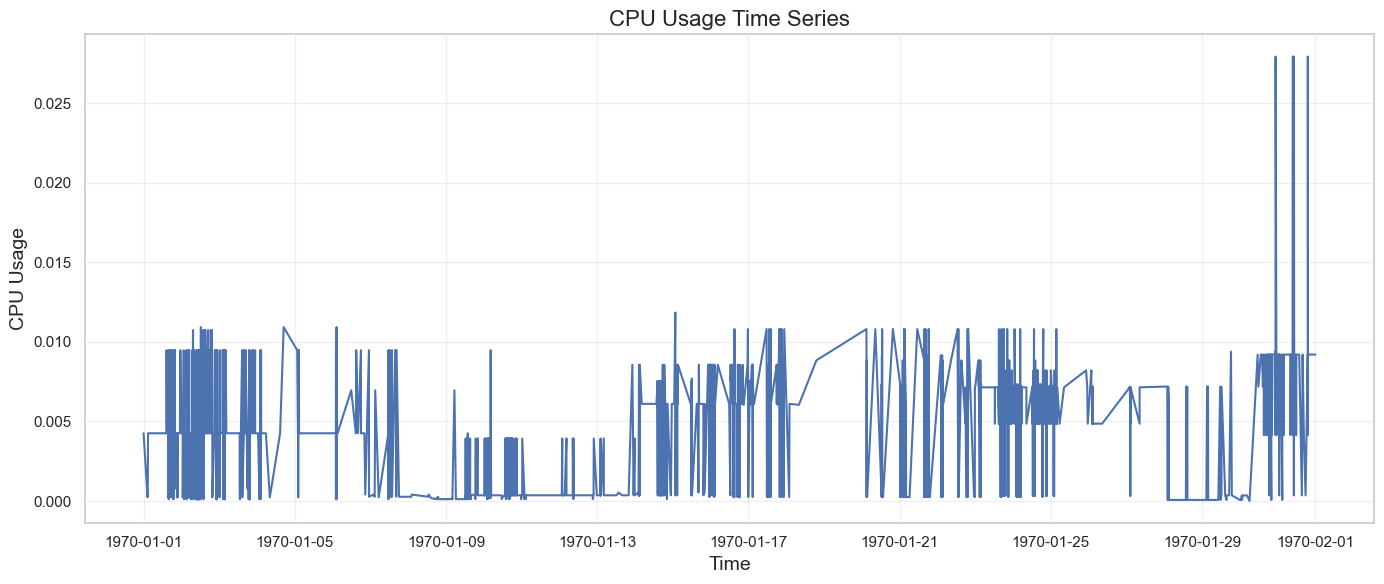

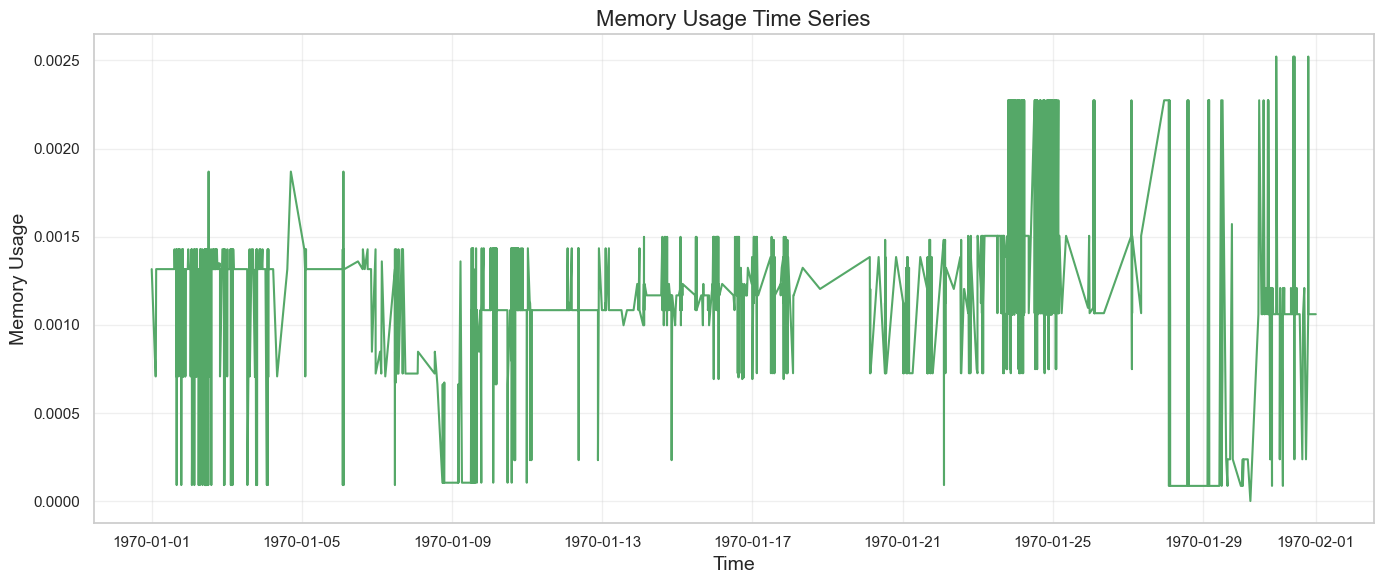

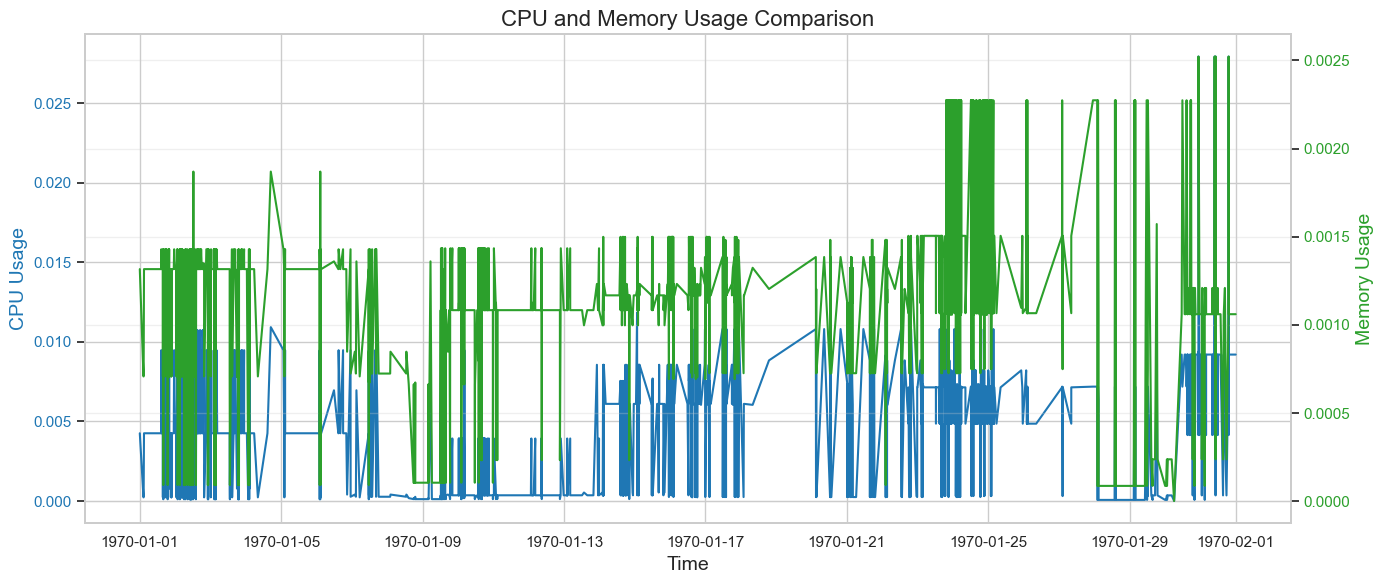

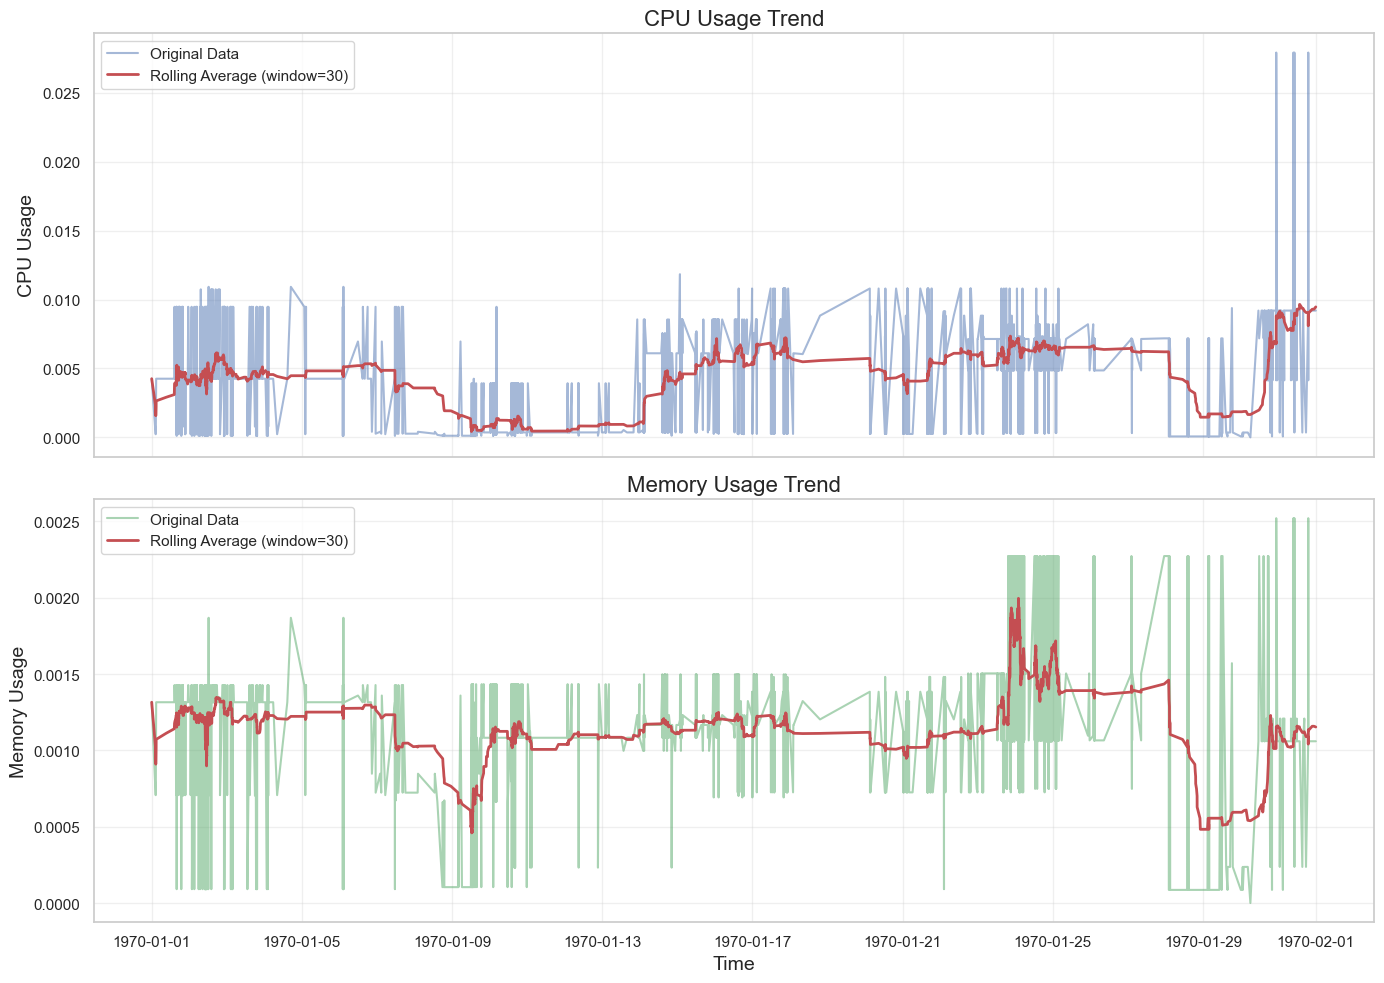


CPU使用率统计:
count    2440.000000
mean        0.004728
std         0.003388
min         0.000000
25%         0.000360
50%         0.004257
75%         0.007187
max         0.027924
Name: average_usage_cpu, dtype: float64

内存使用率统计:
count    2.440000e+03
mean     1.220979e-03
std      4.436349e-04
min      9.536743e-07
25%      1.083374e-03
50%      1.209259e-03
75%      1.428604e-03
max      2.521515e-03
Name: average_usage_memory, dtype: float64


In [108]:
# 处理第一个文件
if data_files:
    process_and_visualize_file(data_files[0])
else:
    print("没有找到数据文件，请检查目录路径")

## 处理多个文件（如果需要）

In [109]:
# 遍历所有文件并可视化（可选）
def process_all_files():
    """处理目录中的所有文件"""
    for i, file_path in enumerate(data_files):
        print(f"\n处理文件 {i+1}/{len(data_files)}: {os.path.basename(file_path)}")
        response = input(f"是否处理此文件? (y/n)")
        if response.lower() == 'y':
            process_and_visualize_file(file_path)
        else:
            print("跳过此文件")

# 取消下面的注释来处理所有文件
# process_all_files()

## 高级分析：资源使用模式

In [110]:
def analyze_resource_patterns(df, time_col='time_dt', cpu_col='average_usage_cpu', memory_col='average_usage_memory'):
    """分析资源使用模式和周期性"""
    # 确保列存在
    required_cols = [time_col, cpu_col, memory_col]
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        print(f"错误: 缺少列: {missing_cols}")
        return
    
    # 确保时间列是datetime类型
    if not pd.api.types.is_datetime64_any_dtype(df[time_col]):
        try:
            df[time_col] = pd.to_datetime(df[time_col])
        except:
            print(f"警告: 无法将 {time_col} 转换为datetime类型")
            return
    
    # 按时间排序
    df_sorted = df.sort_values(by=time_col).copy()
    
    # 提取时间特征
    df_sorted['hour'] = df_sorted[time_col].dt.hour
    df_sorted['day_of_week'] = df_sorted[time_col].dt.dayofweek
    df_sorted['is_weekend'] = df_sorted['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    
    # 1. 按小时分析资源使用
    hourly_stats = df_sorted.groupby('hour').agg({
        cpu_col: ['mean', 'std', 'min', 'max'],
        memory_col: ['mean', 'std', 'min', 'max']
    })
    
    # 绘制按小时的平均使用率
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # CPU小时分布
    ax1.plot(hourly_stats.index, hourly_stats[cpu_col]['mean'], 'bo-', linewidth=2)
    ax1.fill_between(hourly_stats.index, 
                     hourly_stats[cpu_col]['mean'] - hourly_stats[cpu_col]['std'], 
                     hourly_stats[cpu_col]['mean'] + hourly_stats[cpu_col]['std'], 
                     alpha=0.3, color='blue')
    ax1.set_title('CPU Usage Hourly Distribution', fontsize=16)
    ax1.set_ylabel('Average CPU Usage', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Memory Hourly Distribution
    ax2.plot(hourly_stats.index, hourly_stats[memory_col]['mean'], 'go-', linewidth=2)
    ax2.fill_between(hourly_stats.index, 
                     hourly_stats[memory_col]['mean'] - hourly_stats[memory_col]['std'], 
                     hourly_stats[memory_col]['mean'] + hourly_stats[memory_col]['std'], 
                     alpha=0.3, color='green')
    ax2.set_title('Memory Usage Hourly Distribution', fontsize=16)
    ax2.set_xlabel('Hour', fontsize=14)
    ax2.set_ylabel('Average Memory Usage', fontsize=14)
    ax2.set_xticks(range(0, 24))
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    #plt.savefig('hourly_resource_patterns.png', dpi=300)
    plt.show()
    
    # 2. Weekday vs Weekend Analysis
    day_type_stats = df_sorted.groupby('is_weekend').agg({
        cpu_col: ['mean', 'std', 'min', 'max', 'count'],
        memory_col: ['mean', 'std', 'min', 'max']
    })
    
    # Create Weekday vs Weekend Comparison Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # CPU Weekday vs Weekend
    labels = ['Weekday', 'Weekend']
    ax1.bar(labels, day_type_stats[cpu_col]['mean'], yerr=day_type_stats[cpu_col]['std'], capsize=10, color='blue', alpha=0.7)
    ax1.set_title('Weekday vs Weekend CPU Usage', fontsize=16)
    ax1.set_ylabel('Average CPU Usage', fontsize=14)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Memory Weekday vs Weekend
    ax2.bar(labels, day_type_stats[memory_col]['mean'], yerr=day_type_stats[memory_col]['std'], capsize=10, color='green', alpha=0.7)
    ax2.set_title('Weekday vs Weekend Memory Usage', fontsize=16)
    ax2.set_ylabel('Average Memory Usage', fontsize=14)
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    #plt.savefig('weekday_weekend_comparison.png', dpi=300)
    plt.show()
    
    # 3. CPU and Memory Correlation Analysis
    correlation = df_sorted[[cpu_col, memory_col]].corr().iloc[0, 1]
    
    plt.figure(figsize=(10, 8))
    plt.scatter(df_sorted[cpu_col], df_sorted[memory_col], alpha=0.5)
    plt.title(f'CPU and Memory Usage Correlation (r = {correlation:.4f})', fontsize=16)
    plt.xlabel('CPU Usage', fontsize=14)
    plt.ylabel('Memory Usage', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Add Regression Line
    z = np.polyfit(df_sorted[cpu_col], df_sorted[memory_col], 1)
    p = np.poly1d(z)
    plt.plot(df_sorted[cpu_col], p(df_sorted[cpu_col]), "r--", linewidth=2)
    
    plt.tight_layout()
    #plt.savefig('cpu_memory_correlation.png', dpi=300)
    plt.show()
    
    # 4. Resource Usage Distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # CPU Usage Distribution
    sns.histplot(df_sorted[cpu_col], kde=True, ax=ax1, color='blue', alpha=0.7)
    ax1.set_title('CPU Usage Distribution', fontsize=16)
    ax1.set_xlabel('CPU Usage', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Memory Usage Distribution
    sns.histplot(df_sorted[memory_col], kde=True, ax=ax2, color='green', alpha=0.7)
    ax2.set_title('Memory Usage Distribution', fontsize=16)
    ax2.set_xlabel('Memory Usage', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    #plt.savefig('resource_usage_distribution.png', dpi=300)
    plt.show()
    
    # 打印统计结果摘要
    print("\n资源使用模式分析摘要:")
    print(f"CPU和内存使用率相关性: {correlation:.4f}")
    print("\n每小时平均CPU使用率:")
    print(hourly_stats[cpu_col]['mean'])
    print("\n工作日vs周末资源使用:")
    print(day_type_stats)

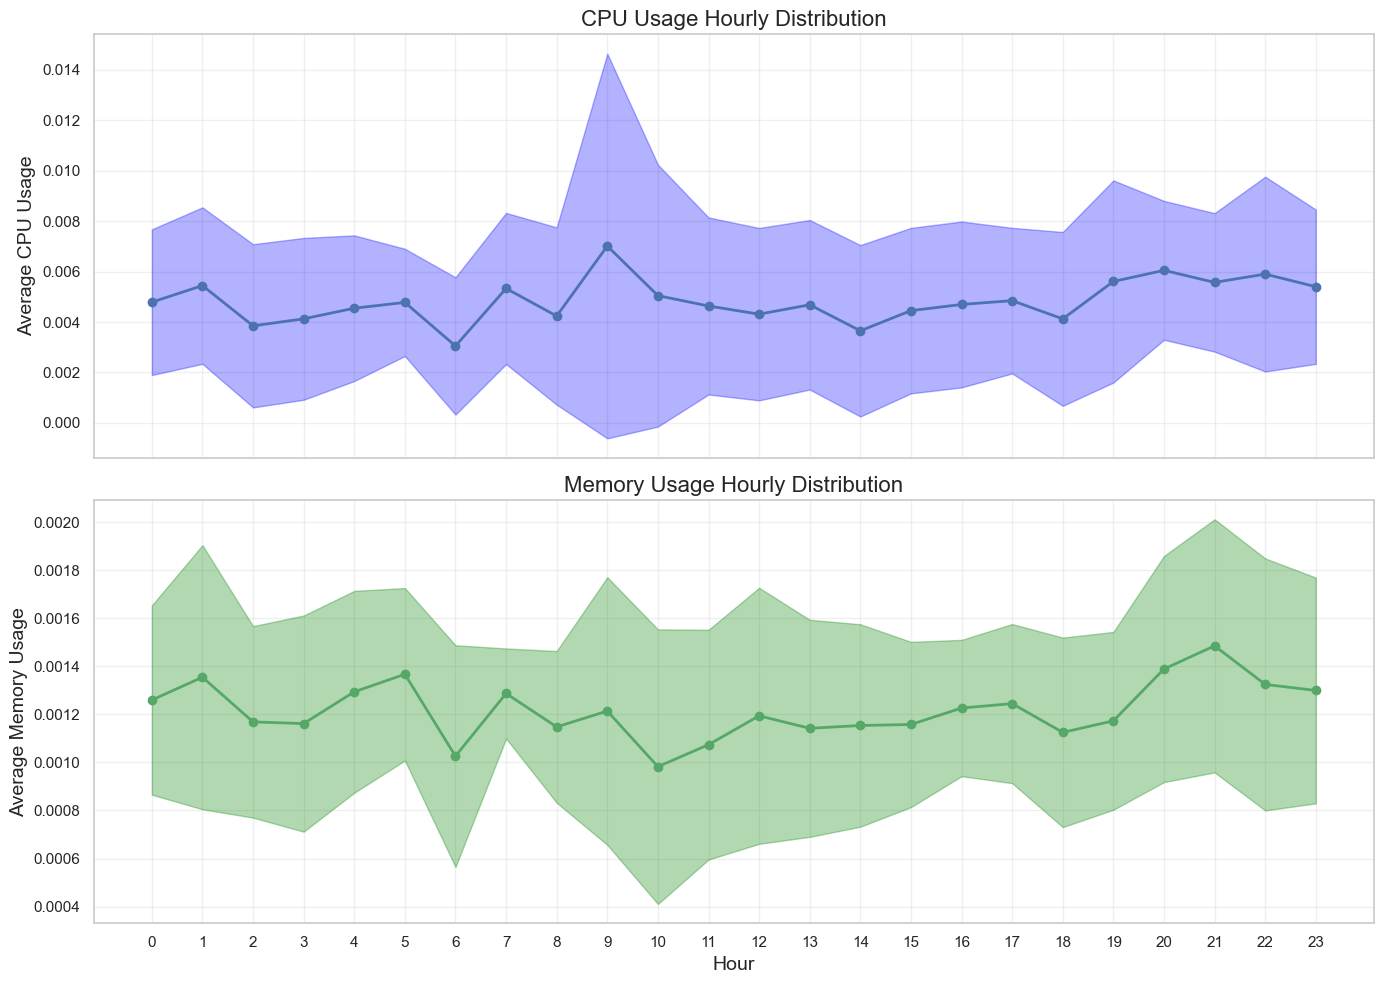

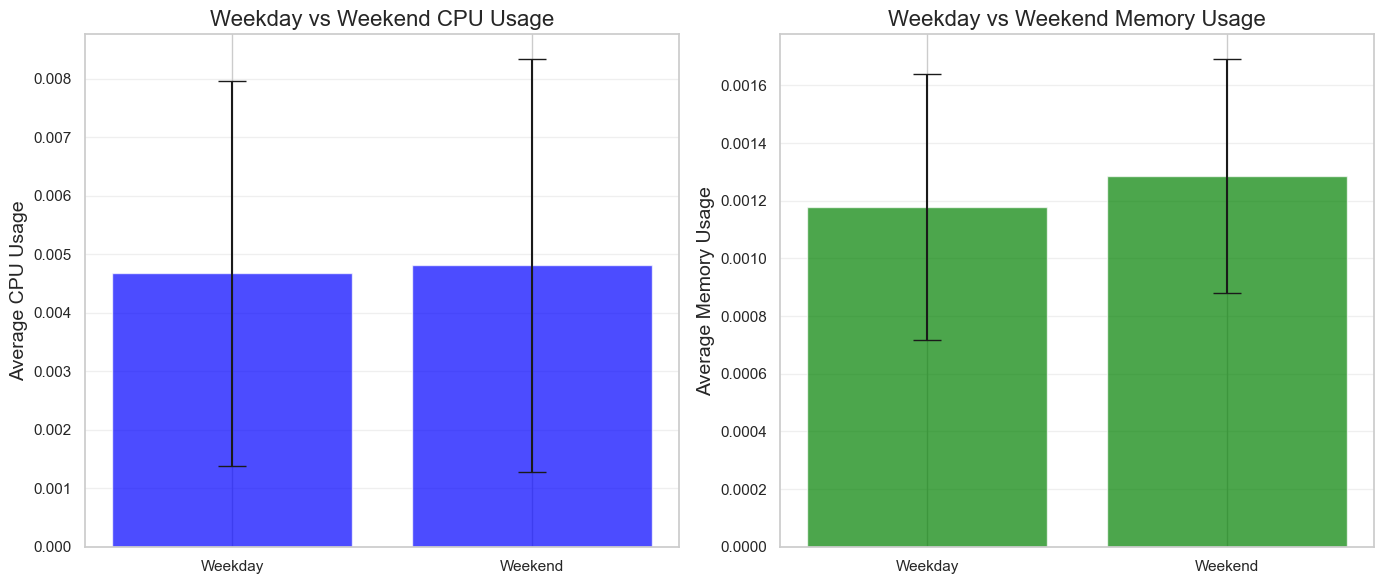

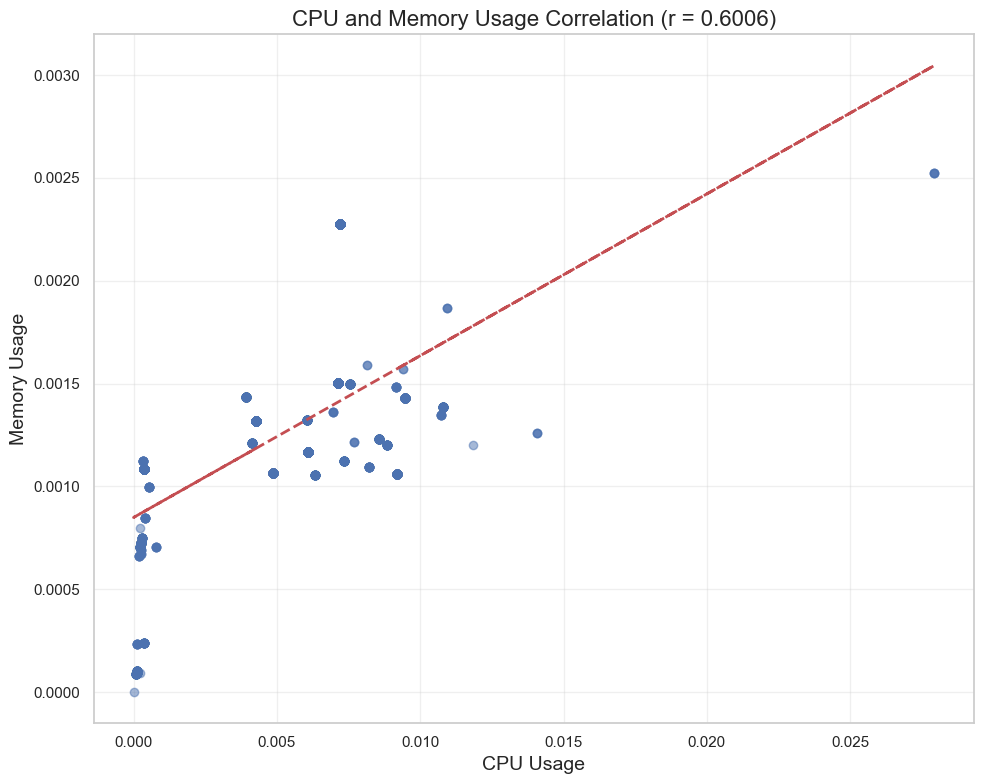

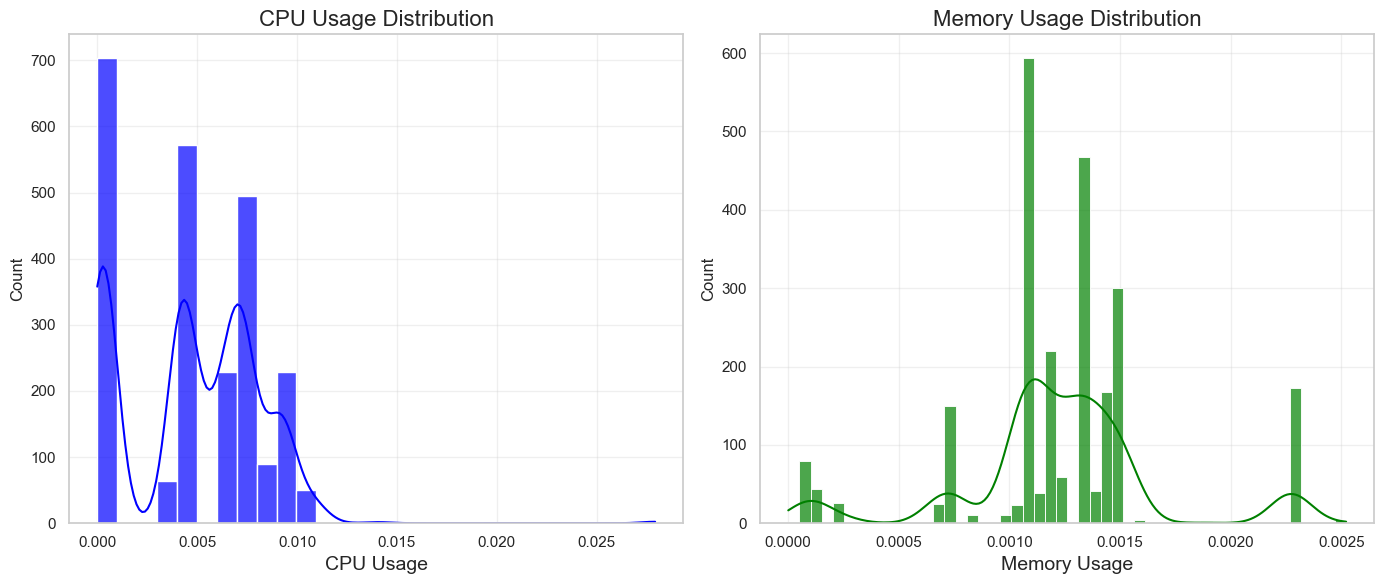


资源使用模式分析摘要:
CPU和内存使用率相关性: 0.6006

每小时平均CPU使用率:
hour
0     0.004788
1     0.005446
2     0.003850
3     0.004127
4     0.004549
5     0.004779
6     0.003051
7     0.005332
8     0.004239
9     0.007015
10    0.005048
11    0.004638
12    0.004313
13    0.004685
14    0.003653
15    0.004453
16    0.004697
17    0.004849
18    0.004125
19    0.005609
20    0.006052
21    0.005573
22    0.005902
23    0.005402
Name: mean, dtype: float64

工作日vs周末资源使用:
           average_usage_cpu                                     \
                        mean       std      min       max count   
is_weekend                                                        
0                   0.004675  0.003292  0.00000  0.027924  1479   
1                   0.004811  0.003531  0.00007  0.027924   961   

           average_usage_memory                                    
                           mean       std           min       max  
is_weekend                                                         
0     

In [111]:
# 对第一个文件进行更深入的模式分析
if data_files:
    try:
        df = pd.read_csv(data_files[0])
        
        # 确定列名
        time_col = None
        cpu_col = None
        memory_col = None
        
        # 寻找时间列
        time_candidates = [col for col in df.columns if 'time' in col.lower() and 'dt' in col.lower()]
        if time_candidates:
            time_col = time_candidates[0]
            # 确保转换为datetime类型
            df[time_col] = pd.to_datetime(df[time_col])
        
        # 寻找CPU列和内存列
        if 'average_usage_cpu' in df.columns:
            cpu_col = 'average_usage_cpu'
        if 'average_usage_memory' in df.columns:
            memory_col = 'average_usage_memory'
        
        if time_col and cpu_col and memory_col:
            analyze_resource_patterns(df, time_col=time_col, cpu_col=cpu_col, memory_col=memory_col)
        else:
            print("缺少必要的列，无法进行模式分析")
            
    except Exception as e:
        print(f"分析资源模式时出错: {e}")